# Project #4：SSB Modulation and Demodulation

Consider two information signals, one a time-domain rectangular pulse and the other a timedomain triangular pulse. Choose the duration and amplitude of each pulse as you wish.
Design and implement a SSB modulator/demodulator to transmit/recover these pulses such that one signal is assigned to the USB while the other is assigned to the LSB. The SSB signal
is assumed to be transmitted through a noise-free and distortion-free channel. The modulator is shown in iamge. The demodulator should use the coherent detection method.




(Due Date: 23/11/2023, class time)
Jie Wang


![image](generation_ssb.png)

## Project requirements: 

Implement both the modulator and demodulator using Python and plot all relevant signals in both time and frequency domain. You should verify that your system is working by exhibiting two reconstructed rectangular and triangular pulses at the demodulator’s outputs. 

Provide also sketches or spectra and all relevant mathematical details explaining how your design works. 


No need to rederive SSB modulation/demodulation as you did in the homework, only provide information needed for this purpose of this project.


![image](demodulation_ssb.png)


### 1. Design the SSB Modulator

The modulator will consist of:
- A product modulator that multiplies the message signal $ m(t) $ with a carrier wave $ A_c \cos(2\pi f_c t) $.
- A band-pass filter that selects either the upper or the lower sideband, depending on whether we want to transmit the USB or LSB.


### 2. Design the SSB Demodulator

The demodulator will use the coherent detection method, which consists of:
- A product modulator that multiplies the received SSB signal with a synchronized carrier wave.
- A low-pass filter to retrieve the baseband message signal.

### 3. Implement Modulator/Demodulator in Python

We will use Python with libraries like NumPy and Matplotlib to implement the modulator and demodulator and to plot the signals.

### 4. Test the System

To verify the system, we will:
- Generate a rectangular pulse and a triangular pulse.
- Modulate each using SSB, assigning one to USB and the other to LSB.
- Pass the modulated signal through a simulated channel.
- Demodulate the signal using coherent detection.
- Plot the original and demodulated signals to verify that they match.

### 5. Provide Mathematical Details and Sketches

We will explain:
- The mathematical process behind SSB modulation and demodulation.
- How the band-pass filter is designed to select the desired sideband.
- The method of coherent detection.




In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, lfilter, hilbert

# Define the message signals
def rect_pulse(t, duration, amplitude):
    return amplitude * (np.abs(t) < duration / 2)

def tri_pulse(t, duration, amplitude):
    return amplitude * (np.maximum(0, 1 - np.abs(t) / duration))

# Define the carrier signal
def carrier_signal(t, Ac, fc):
    return Ac * np.cos(2 * np.pi * fc * t)

# SSB Modulator
def ssb_modulate(t, m_t, Ac, fc, usb=True):
    # Perform modulation
    modulated_signal = m_t * carrier_signal(t, Ac, fc)
    # Extract the analytic signal (Hilbert transform)
    analytic_signal = hilbert(modulated_signal)
    if usb:
        return np.real(analytic_signal * np.exp(1j * 2 * np.pi * fc * t))
    else:
        return np.real(analytic_signal * np.exp(-1j * 2 * np.pi * fc * t))

# SSB Demodulator
def ssb_demodulate(t, s_t, Ac, fc, usb=True):
    # Perform coherent detection
    coherent_detector_output = s_t * carrier_signal(t, Ac, fc)
    # Low-pass filter to retrieve the baseband signal
    # Define a low-pass filter
    b, a = butter(5, 0.1)
    # Filter the signal
    return lfilter(b, a, coherent_detector_output)

# parameter setting
t = np.linspace(-1, 1, 1000)  # Time vector
Ac = 1
fc = 1000  # Carrier frequency
rect_pulse_signal = rect_pulse(t, 0.5, 1)
tri_pulse_signal = tri_pulse(t, 0.5, 1)

# Modulate the signals
ssb_rect = ssb_modulate(t, rect_pulse_signal, Ac, fc, usb=True)
ssb_tri = ssb_modulate(t, tri_pulse_signal, Ac, fc, usb=False)

# Demodulate the signals
demod_rect = ssb_demodulate(t, ssb_rect, Ac, fc, usb=True)
demod_tri = ssb_demodulate(t, ssb_tri, Ac, fc, usb=False)



The `ssb_modulate` and `ssb_demodulate` functions are simplified and would need to be fleshed out with appropriate filtering. Note that the Hilbert transform in `ssb_modulate` is a simplified approach to generating the SSB signal and may not perfectly isolate the USB or LSB. In practice, you would use a band-pass filter designed to pass only the desired sideband.

Remember, this is a high-level overview, and each function must be carefully designed and implemented according to the signal processing requirements of SSB modulation and demodulation.

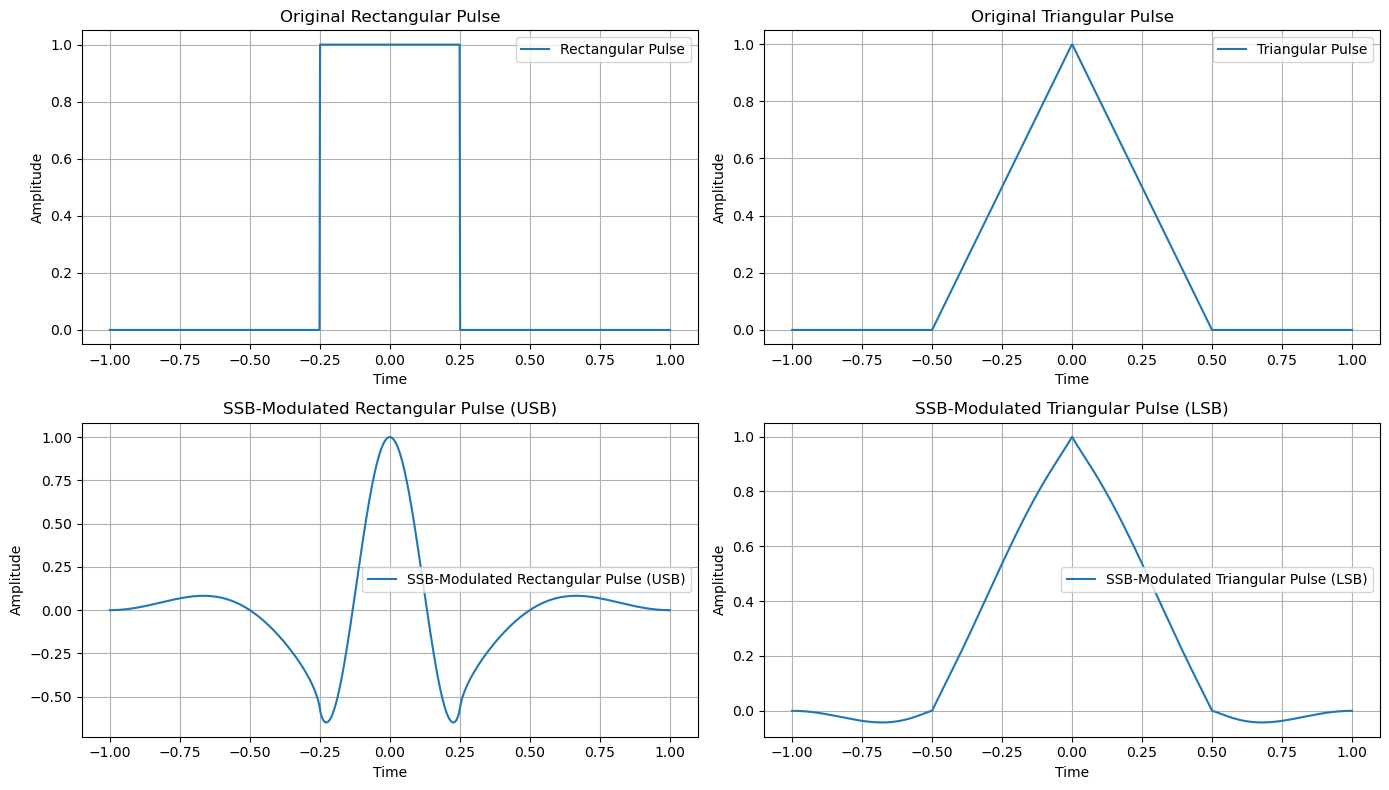

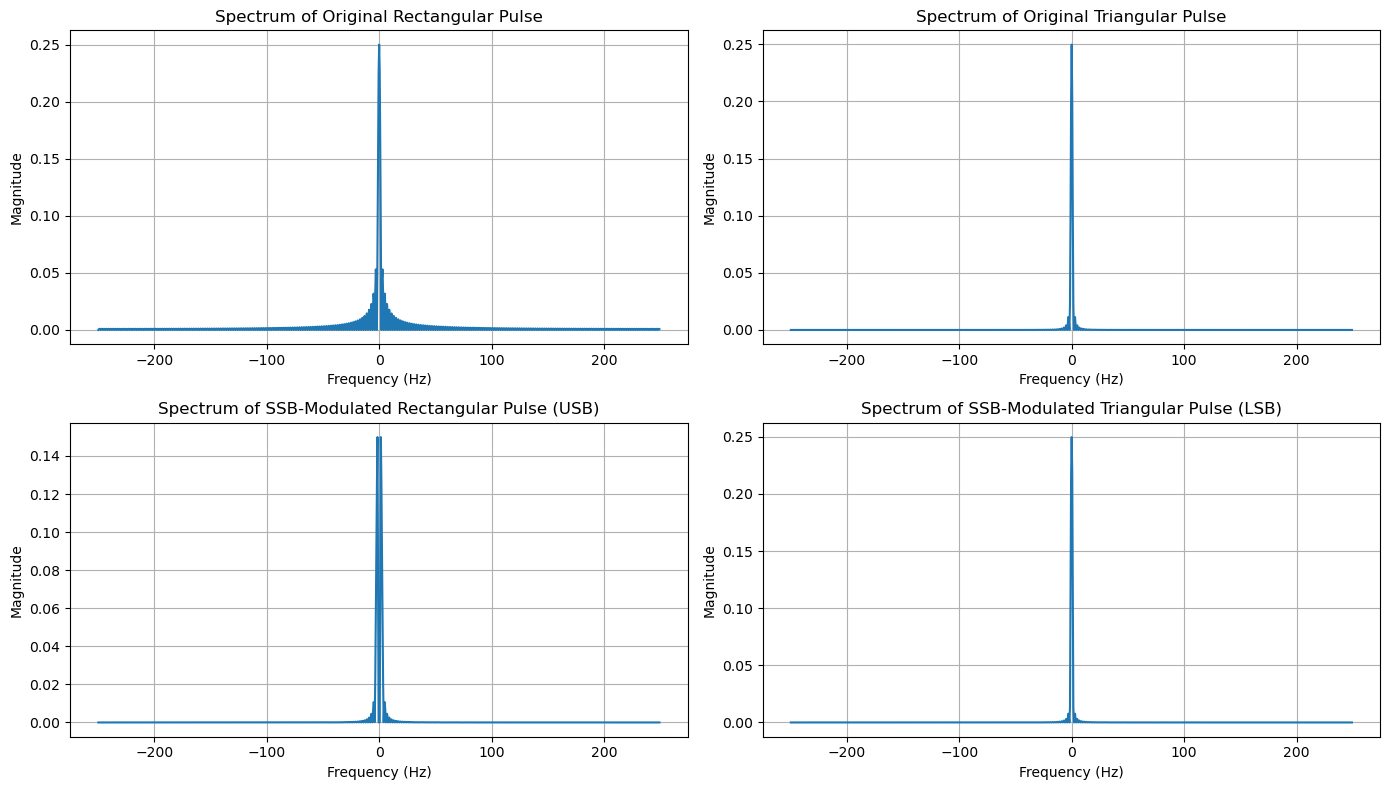

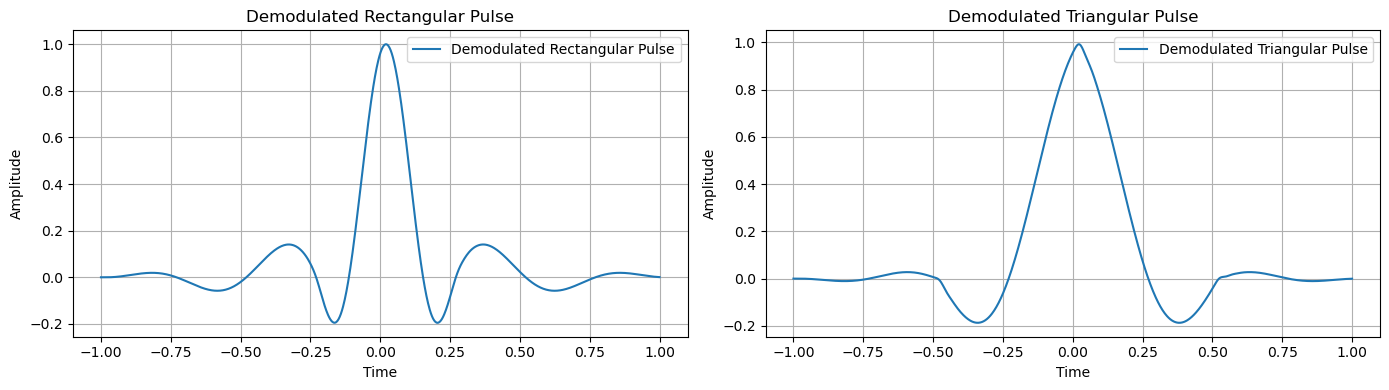

In [3]:
# Plotting in Time Domain
plt.figure(figsize=(14, 8))

# Plot the original message signals
plt.subplot(2, 2, 1)
plt.plot(t, rect_pulse_signal, label='Rectangular Pulse')
plt.title('Original Rectangular Pulse')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.grid(True)
plt.legend()

plt.subplot(2, 2, 2)
plt.plot(t, tri_pulse_signal, label='Triangular Pulse')
plt.title('Original Triangular Pulse')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.grid(True)
plt.legend()

# Plot the SSB-modulated signals
plt.subplot(2, 2, 3)
plt.plot(t, ssb_rect, label='SSB-Modulated Rectangular Pulse (USB)')
plt.title('SSB-Modulated Rectangular Pulse (USB)')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.grid(True)
plt.legend()

plt.subplot(2, 2, 4)
plt.plot(t, ssb_tri, label='SSB-Modulated Triangular Pulse (LSB)')
plt.title('SSB-Modulated Triangular Pulse (LSB)')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

# Plotting in Frequency Domain
from scipy.fft import fft, fftshift, fftfreq

# Calculate the FFT and frequencies for plotting
def plot_spectrum(signal, t, title):
    N = len(t)
    T = t[1] - t[0]  # Sample spacing
    yf = fft(signal)
    xf = fftfreq(N, T)
    xf = fftshift(xf)
    yplot = fftshift(yf)
    
    plt.plot(xf, 1.0/N * np.abs(yplot))
    plt.title(title)
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Magnitude')
    plt.grid(True)

plt.figure(figsize=(14, 8))

# Plot the frequency spectrum of the original message signals
plt.subplot(2, 2, 1)
plot_spectrum(rect_pulse_signal, t, 'Spectrum of Original Rectangular Pulse')

plt.subplot(2, 2, 2)
plot_spectrum(tri_pulse_signal, t, 'Spectrum of Original Triangular Pulse')

# Plot the frequency spectrum of the SSB-modulated signals
plt.subplot(2, 2, 3)
plot_spectrum(ssb_rect, t, 'Spectrum of SSB-Modulated Rectangular Pulse (USB)')

plt.subplot(2, 2, 4)
plot_spectrum(ssb_tri, t, 'Spectrum of SSB-Modulated Triangular Pulse (LSB)')

plt.tight_layout()
plt.show()

# Plotting the demodulated signals in Time Domain
plt.figure(figsize=(14, 4))

plt.subplot(1, 2, 1)
plt.plot(t, demod_rect, label='Demodulated Rectangular Pulse')
plt.title('Demodulated Rectangular Pulse')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.grid(True)
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(t, demod_tri, label='Demodulated Triangular Pulse')
plt.title('Demodulated Triangular Pulse')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()


The alteration of the rectangular pulse in the SSB-modulated signal (as shown in the bottom left plot) is likely due to the characteristics of the modulation and filtering processes.

Here are some insights and potential solutions for addressing the alteration:

1. **Bandwidth of the Filter**: If the band-pass filter used for SSB modulation does not have a wide enough bandwidth to accommodate the spectrum of the rectangular pulse, it will distort the signal. The rectangular pulse has a wide frequency spectrum due to its sudden transitions, so ensure the filter bandwidth is sufficiently wide to pass all significant frequency components of the signal.

2. **Filter Edges**: If the band-pass filter has very sharp cutoff edges or a non-linear phase response, it can introduce ringing artifacts due to the Gibbs phenomenon. Consider using a filter with smoother transition bands and a linear phase response to minimize distortion.

3. **Time-Bandwidth Product**: There is a trade-off between the time duration and bandwidth of a signal. For a rectangular pulse, which has a high time-bandwidth product, it's essential to have a filter that can handle this effectively. Adjusting the duration and bandwidth to match the filter's characteristics can help.

4. **Modulation Index**: In SSB modulation, if the modulation index is not set appropriately, it can lead to over-modulation or under-modulation, both of which can distort the signal. Ensure that the modulation index is set correctly for the range of the message signal.

5. **Sampling Rate**: If you are using a digital system for SSB modulation, make sure that the sampling rate is high enough according to the Nyquist theorem to accurately represent the signal and avoid aliasing.

6. **Hilbert Transform**: For SSB modulation, the Hilbert transform is often used to create the analytic signal before filtering. Ensure that the Hilbert transform is accurately computed. Numerical inaccuracies in the Hilbert transform can introduce errors in the modulated signal.

7. **Envelope Distortion**: The envelope of the modulated signal can be distorted if the carrier frequency is not significantly higher than the highest frequency component of the message signal. Increase the carrier frequency if needed.

8. **Simulation Parameters**: Review all parameters in your simulation, including the time step, duration of the pulses, and the characteristics of the filters used. Ensure they are all optimized for the signals you are trying to modulate and demodulate.

To fix the issue, start by examining the filter's bandwidth and characteristics, then look at the sampling rate and the way the Hilbert transform is implemented in your code. Adjusting these factors should help you preserve the shape of the rectangular pulse through the SSB modulation process.